In [1]:
# Copyright 2023, Acadential, All rights reserved.

# 2-7. PyTorch 기초 - Transforms

```torchvision```에서는 다양한 transformation 함수들을 제공합니다. \
이들을 사용해서 데이터셋을 더 다양하게 변형시킬 수 있습니다. \
예를 들어서 이미지를 무작위로 자르거나, 회전시키거나, 뒤집거나, 희미하게 만드는 변형 방법들이 있습니다.
이미지 데이터를 다양하게 변형시켜서 모델을 학습시키는 방법을 Data Augmentation이라고 합니다. \
참고로, Data Augmentation은 한정된 데이터셋을 더 다양하게 만들어서 모델의 성능을 높이는 방법입니다. \
마치 데이터가 더 많아진 것처럼 학습시키는 효과가 있어서 Data Augmentation 즉 데이터 증강 방법이라고 불립니다. \
Data Augmentation 방법은 모델이 Overfitting 되는 것을 방지하는데도 도움을 줍니다.


살펴볼 내용들:
1. torchvision.transforms \
    1-1. GaussianBlur
    1-2. Compose \
    1-3. RandomAffine
2. Lambda transforms

In [1]:
import numpy as np 
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision


# Load Image

먼저 이번 시간에 사용할 예시 이미지를 불러옵니다.

(480, 320)
(60, 40)


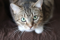

In [4]:
from PIL import Image 
img = Image.open("./sample_images/cat_img.jpeg")
size = img.size
print(size)
img = img.resize((size[0]//8, size[1]//8))
size = img.size
print(size)
img

# ```torchvision.transforms``` 을 사용한 Data Augmentation

```torchvision``` library에서 다양한 transform 함수들을 제공해줍니다. [링크](https://pytorch.org/vision/stable/transforms.html)

이 중에서:
```GaussianBlur```, ```RandomAffine```, ```Compose```을 살펴보겠습니다


## GaussianBlur

GaussianBlur이란 이미지를 흐리게(blur) 처리하는 방법 중 하나입니다. \
이미지를 흐리게 만들면 노이즈를 제거하거나, 이미지의 특정 부분을 강조하는데 사용할 수 있습니다. \
Gaussian 필터는 이미지의 픽셀을 중심으로 주변 픽셀들을 Gaussian 분포로 가중합하여 픽셀 값을 재조정해줍니다.

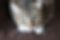

In [5]:
# Gaussian Blur
# kernel_size : 이미지 픽셀 중심으로 흐리게 만들 window 크기
# sigma : 가우시안분포의 표준편차
gaussian_blur = torchvision.transforms.GaussianBlur(kernel_size=5, sigma=(6.0, 6.0))
gaussian_blur(img)

## RandomAffine

Random affine이란 이미지를 랜덤하게 affine 변환 (기하학적인 변환)을 시키는 것입니다. \
Affine 변환은 선의 평행성을 유지하며, 직선은 직선으로 보존된다. 이러한 affine 변환은 이미지를 확대, 축소, 회전, 전단, 기울임 등을 할 수 있습니다.

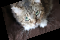

In [7]:
# degrees : rotaion을 랜덤하게 -20~20도만큼 회전을 가하겠다.
# translate : +10%, -10%씩 랜덤하게 움직이겠다
# scale : 0.8배 축소하거나 1.2배 증가 그사이의 스케일들을 랜덤하게 샘플링해서 변환을 해주겠다.
# shear : 전단 변환(shear transformation)은 직사각형 형태의 영상을 한쪽 방향으로 밀어서
#  평행사변형 모양으로 변형되는 변환이며 층밀림 변환)
random_affine = torchvision.transforms.RandomAffine(degrees=20,  # rotation (회전 )
                                    translate=(0.1, 0.1),  # 평행이동
                                    scale=(0.8, 1.2),  # Scaling (크기)
                                    shear=15  # 전단 
                                   )
random_affine(img)

## Compose

여러 개의 transform들을 합쳐서 사용하고 싶은 경우 ```torchvision.transforms.Compose```를 사용할 수 있습니다.


In [8]:
combined_transform = torchvision.transforms.Compose([
    gaussian_blur,
    random_affine,
])

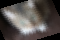

In [9]:
combined_transform(img)

# Lambda Transform

Custom transform 함수를 만들고 싶을때 ```Lambda```을 사용할 수 있습니다. \
다음 예제는 integer label값을 one-hot-vector label로 바꿔주는 함수입니다

In [11]:
from torchvision.transforms import Lambda

In [12]:
target_transform = Lambda(lambda y: torch.zeros(
                                                10, dtype=torch.float # 모든값이 0인 10개값을 가지는 텐서 생성
                                                ).scatter_(
                                                            dim=0, index=torch.tensor(y), value=1 # y값이 1인 텐서생성
                                                            ))

In [13]:
# 매개변수가 y
target_transform(0)  # 0번째 index의 값이 1인 tensor가 출력됩니다.

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
target_transform(1)  # 1번째 index의 값이 1인 tensor가 출력됩니다.

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])